In [1]:
import random

import matplotlib.pyplot as plt
import numpy
from deap import algorithms, base, creator, tools

from config import ITEMS
from knapsack.utils import evaluate

%matplotlib inline

random.seed(42)

In [2]:
creator.create('FitnessMax', base.Fitness, weights=(1.0,))
creator.create('Individual', list, fitness=creator.FitnessMax)

In [3]:
toolbox = base.Toolbox()

toolbox.register('mate', tools.cxTwoPoint)
toolbox.register('mutate', tools.mutFlipBit, indpb=1.0 / len(ITEMS))
toolbox.register('select', tools.selTournament, tournsize=3)
toolbox.register('evaluate', evaluate)

toolbox.register('individualCreator', tools.initRepeat, creator.Individual, lambda: random.randint(0, 1), n=len(ITEMS))
toolbox.register('populationCreator', tools.initRepeat, list, toolbox.individualCreator)

In [4]:
stats = tools.Statistics(key=lambda individual: individual.fitness.values)
stats.register('min', numpy.min)
stats.register('avg', numpy.mean)
stats.register('median', numpy.median)
stats.register('max', numpy.max)

In [5]:
CROSSOVER_PROBABILITY = 0.75
MUTATION_PROBABILITY = 0.1
MAX_GENERATIONS = 500
POPULATION_SIZE = 50

In [6]:
toolbox.register(
    'maximize',
    function=algorithms.eaSimple,
    toolbox=toolbox,
    cxpb=CROSSOVER_PROBABILITY,
    mutpb=MUTATION_PROBABILITY,
    ngen=MAX_GENERATIONS,
    stats=stats,
    verbose=True,
)

In [7]:
best_individuals, logbook = toolbox.maximize(
    population=toolbox.populationCreator(n=POPULATION_SIZE),
)

gen	nevals	min	avg   	median	max
0  	50    	0  	229.28	0     	770
1  	43    	0  	365.2 	449.5 	770
2  	44    	0  	471.02	554.5 	770
3  	37    	0  	494.7 	606   	770
4  	48    	0  	603.8 	668.5 	782
5  	46    	0  	516.54	686   	792
6  	30    	0  	663.76	730   	887
7  	40    	0  	639.4 	762   	927
8  	40    	0  	660   	800   	927
9  	40    	0  	676.72	812.5 	927
10 	39    	0  	810.9 	857   	942
11 	38    	0  	809.7 	890   	942
12 	41    	0  	745.66	927   	942
13 	37    	0  	886.82	927   	942
14 	36    	0  	842.84	927   	942
15 	40    	0  	830.76	927   	942
16 	36    	0  	792.22	927   	942
17 	34    	0  	852.94	942   	942
18 	46    	0  	863.14	942   	942
19 	39    	0  	884.38	942   	942
20 	31    	0  	878.94	942   	942
21 	32    	0  	900.62	942   	942
22 	39    	0  	862.54	942   	942
23 	42    	847	940.1 	942   	942
24 	36    	0  	919.76	942   	942
25 	41    	0  	901.12	942   	942
26 	42    	882	940.8 	942   	942
27 	37    	0  	921.72	942   	942
28 	34    	0  	919.96	942   	942
29 	43    

In [8]:
best_individual = max(best_individuals, key=evaluate)
best_individual

[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0]

In [9]:
print('Total taken items weight:')
sum(item.weight for using, item in zip(best_individual, ITEMS) if using)

Total taken items weight:


396

In [10]:
print('Taken items list:')
[item.name for using, item in zip(best_individual, ITEMS) if using]

Taken items list:


['Карта',
 'Компас',
 'Вода',
 'Сэндвич',
 'Глюкоза',
 'Банан',
 'Крем от загара',
 'Непромокаемые штаны',
 'Непромокаемый плащ',
 'Бумажник',
 'Солнечные очки',
 'Носки']

In [11]:
print('Total taken items value:')
evaluate(best_individual)

Total taken items value:


(1030,)

In [12]:
print('Total taken items wight:')
sum(item.weight for using, item in zip(best_individual, ITEMS) if using)

Total taken items wight:


396

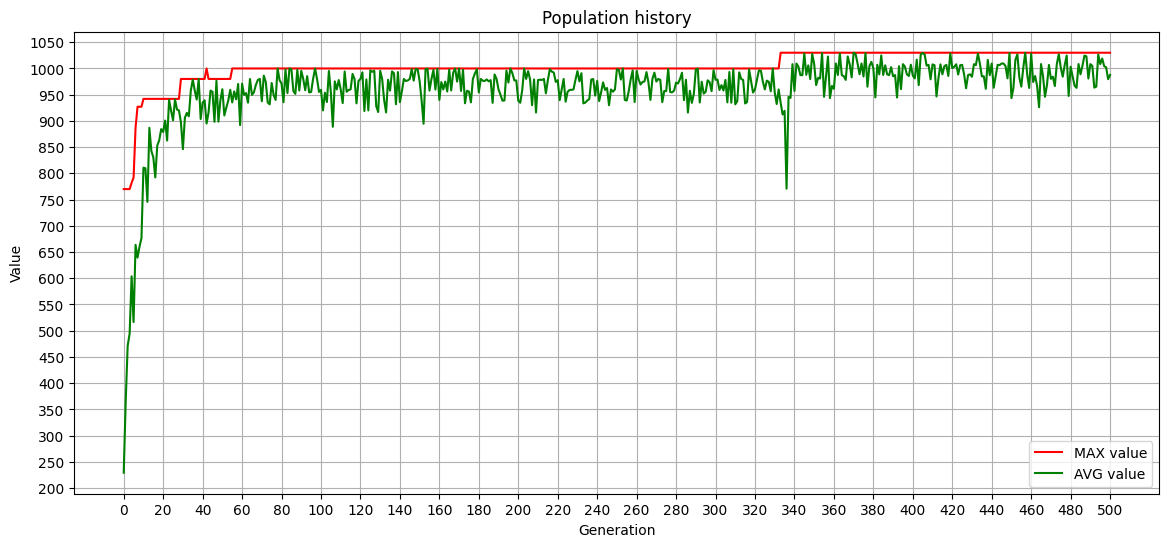

In [13]:
def show_plot(logbook: tools.Logbook):
    fig, ax = plt.subplots(1, figsize=(14, 6))

    ax.grid(True)
    ax.set_yticks(range(0, 1201, 50))
    ax.set_xticks(range(0, MAX_GENERATIONS + 1, 20))

    ax.plot(logbook.select('max'), color='red', label='MAX value')
    ax.plot(logbook.select('avg'), color='green', label='AVG value')

    ax.set_title('Population history')
    ax.set_xlabel('Generation')
    ax.set_ylabel('Value')

    ax.legend()


show_plot(logbook)